# 배깅과 랜덤포레스트

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cencus = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/census_c.csv')
df_cencus.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df_cencus.iloc[:, :-1].to_numpy()
Y = df_cencus.iloc[:, -1].to_numpy()

In [5]:
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)
scores = cross_val_score(rf, X,Y,cv=5)
scores

array([0.85091356, 0.84413391, 0.85135135, 0.85211916, 0.85058354])

In [6]:
np.mean(scores)

0.8498203036376688

In [23]:
bike = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/bike.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
bike_df = bike.drop(columns=['dteday', 'casual', 'registered','instant'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [26]:
X = bike_df.iloc[:, :-1].to_numpy()
Y = bike_df.iloc[:, -1].to_numpy()

In [25]:
bike_df.isnull().mean()
bike_df = bike_df.dropna()

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

In [30]:
scores = cross_val_score(rf, X,Y,scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
rmse, np.mean(rmse)

(array([ 914.26227083,  712.11827962,  515.22938446,  918.12577297,
         937.39450873, 1090.8453572 , 1043.24337039,  790.62026529,
         904.1590641 , 1218.40783345]),
 904.4406107048214)

# 랜덤 포레스트 매개변수

In [32]:
rf = RandomForestRegressor(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)
rf.fit(X,Y)

RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True,
                      random_state=2)

In [17]:
x_cencus = df_cencus.iloc[:, :-1].to_numpy()
y_cencus = df_cencus.iloc[:, -1].to_numpy()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
oob_scores=[]
rfc = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)
rfc.fit(x_cencus, y_cencus)
oob_scores.append(rfc.oob_score_)

est = 50
estimators = [est]
for i in range(9):
    est += 50
    estimators.append(est)
    rfc.set_params(n_estimators=est)
    rfc.fit(x_cencus, y_cencus)
    oob_scores.append(rfc.oob_score_)

In [20]:
oob_scores

[0.8518780135745216,
 0.8551334418476091,
 0.8549184607352354,
 0.8562697705844415,
 0.8568840023340807,
 0.8574675224962378,
 0.8574368109087559,
 0.8569761370965265,
 0.8571296950339363,
 0.8575289456712017]

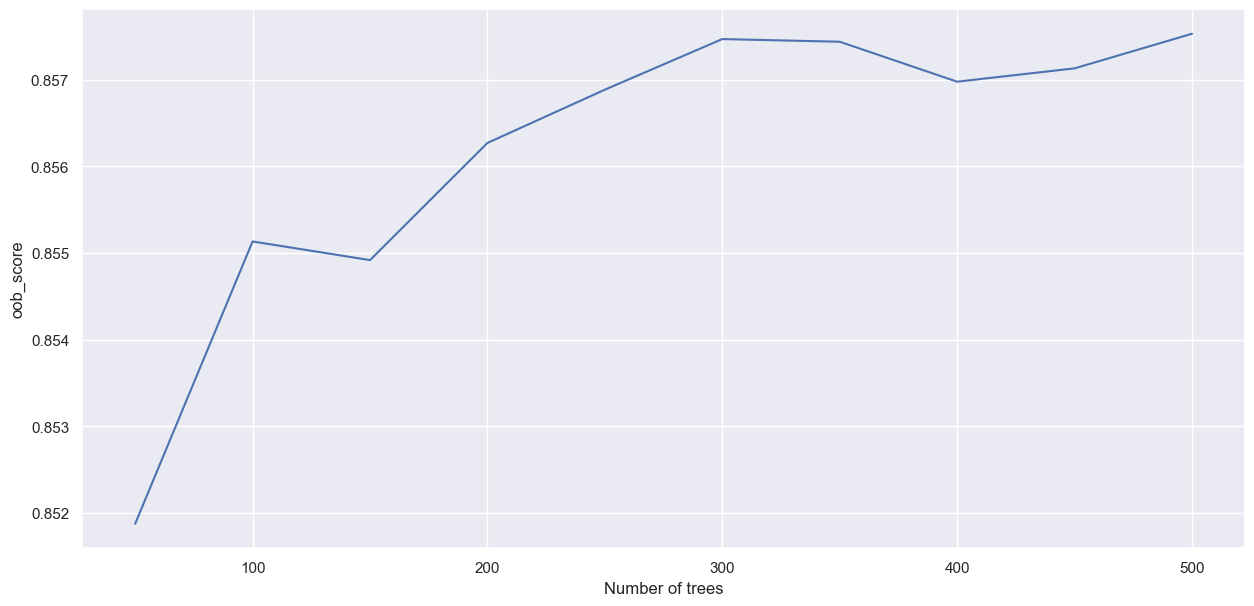

In [21]:
plt.figure(figsize=(15,7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of trees')
plt.ylabel('oob_score')
plt.show()

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_cencus,y_cencus,random_state=2)
etc = ExtraTreesClassifier(n_estimators=550,random_state=2,n_jobs=-1)
scores = cross_val_score(etc,x_train,y_train)
scores

array([0.83619984, 0.84295659, 0.83783784, 0.84930385, 0.84336609])

# 랜덤 포레스트 성능 높이기

In [34]:
bike.drop(columns=['dteday', 'casual', 'registered'], inplace=True)
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [35]:
bike.dropna(inplace=True)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(bike.iloc[:,:-1],bike.iloc[:,-1], random_state=2, test_size=0.2)

In [46]:
from sklearn.metrics import mean_squared_error
rmse_scores = []
estimators = [i*25 for i in range(1,22)]
rfr = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)
est = 10
for est in estimators:
    rfr.set_params(n_estimators=est)
    rfr.fit(x_train, y_train)
    mean_squared_error(y_test, rfr.predict(x_test))
    rmse_scores.append(rmse)
    estimators.append(est)
plt.figure(figsize=(15,7))
plt.plot(estimators, rmse_scores)
plt.xlabel('Number of Tree')
plt.ylabel('RMSE')
plt.show()

ValueError: n_estimators=25 must be larger or equal to len(estimators_)=525 when warm_start==True

In [47]:
rfr = RandomForestRegressor(n_estimators=450, n_jobs=-1, random_state=2)
scores = cross_val_score(rfr, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
rmse.mean()

650.4471733088442

In [48]:
from sklearn.model_selection import RandomizedSearchCV
def randomized_search(params, reg, n_iter=16):
    rsc = RandomizedSearchCV(reg, params, n_iter=n_iter, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, random_state=2)
    rsc.fit(x_train, y_train)
    best_model = rsc.best_estimator_
    best_param = rsc.best_params_
    print('best_param:', best_param)
    best_score = np.sqrt(-rsc.best_score_)
    print('best_score:', best_score)